# Pandas

In [2]:
import os
import pandas as pd
%matplotlib inline

**Pandas** (Python Data Analysis Library) — библиотека языка Python для обработки и анализа данных.


Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Скачаем данные:

In [11]:
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv'

Загрузка данных в **pandas** происходит в специальный объект типа **DataFrame**:

In [12]:
pass_data = pd.read_csv(url, sep='\t')

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [13]:
pass_data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

Посмотрим на признаки:

In [68]:
pass_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [69]:
pass_data[2:5]

pclass  survived                                             name     sex  \
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

    age  sibsp  parch  ticket    fare    cabin embarked boat   body  \
2   2.0      1      2  113781  151.55  C22 C26        S  NaN    NaN   
3  30.0      1      2  113781  151.55  C22 C26        S  NaN  135.0   
4  25.0      1      2  113781  151.55  C22 C26        S  NaN    NaN   

                         home.dest  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [70]:
pass_data.iloc[1:5, 1:3]

survived                                             name
1         1                   Allison, Master. Hudson Trevor
2         0                     Allison, Miss. Helen Loraine
3         0             Allison, Mr. Hudson Joshua Creighton
4         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)

In [71]:
pass_data['name'].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [72]:
pass_data[['name', 'sex', 'parch']].head()

name     sex  parch
0                    Allen, Miss. Elisabeth Walton  female      0
1                   Allison, Master. Hudson Trevor    male      2
2                     Allison, Miss. Helen Loraine  female      2
3             Allison, Mr. Hudson Joshua Creighton    male      2
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female      2

Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [73]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
2       1         0                     Allison, Miss. Helen Loraine  female   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   

    age  sibsp  parch  ticket      fare    cabin embarked boat  body  \
0  29.0      0      0   24160  211.3375       B5        S    2   NaN   
2   2.0      1      2  113781  151.5500  C22 C26        S  NaN   NaN   
4  25.0      1      2  113781  151.5500  C22 C26        S  NaN   NaN   
6  63.0      1      0   13502   77.9583       D7        S   10   NaN   
8  53.0      2      0   11769   51.4792     C101        S    D   NaN   

                         home.dest  
0                     St Louis, MO  
2  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
6                       Hudson, NY  
8              Bayside, Queens, NY

In [74]:
# женщины старше 60 и мужчины на борту
pass_data[(pass_data['sex'] == 'female') & (pass_data['age'] >= 60) | (pass_data['sex'] == 'male')].head()

pclass  survived                                  name     sex    age  \
1       1         1        Allison, Master. Hudson Trevor    male   0.92   
3       1         0  Allison, Mr. Hudson Joshua Creighton    male  30.00   
5       1         1                   Anderson, Mr. Harry    male  48.00   
6       1         1     Andrews, Miss. Kornelia Theodosia  female  63.00   
7       1         0                Andrews, Mr. Thomas Jr    male  39.00   

   sibsp  parch  ticket      fare    cabin embarked boat   body  \
1      1      2  113781  151.5500  C22 C26        S   11    NaN   
3      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
5      0      0   19952   26.5500      E12        S    3    NaN   
6      1      0   13502   77.9583       D7        S   10    NaN   
7      0      0  112050    0.0000      A36        S  NaN    NaN   

                         home.dest  
1  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY  
7                      Belfast, NI

#### Пример
Посмотрим, сколько на борту было относительно молодых женщин, путешествующих в одиночку. Скорее всего, довольно мало, потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.

In [75]:
pass_data[(pass_data.sex == 'female') & 
          (pass_data.age > 18) & 
          (pass_data.age < 25) & 
          (pass_data.sibsp == 0) &
          (pass_data.parch == 0)].shape

(41, 14)

Кроме того, для заданного признака можно построить гистограмму:

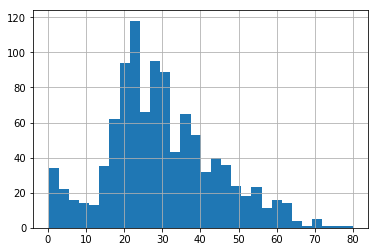

In [76]:
pass_data.age.hist(bins = 30)

## Редактирование DataFrame

* Переименование признаков

In [77]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

pclass  survived                                             name     Sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [78]:
def get_last_name(name):
    return name.split(',')[0].strip()

last_names = pass_data['name'].apply(get_last_name)
last_names.head()

0      Allen
1    Allison
2    Allison
3    Allison
4    Allison
Name: name, dtype: object

* Добавление признака

In [79]:
pass_data['Last_name'] = last_names
pass_data.head()

pclass  survived                                             name     Sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest Last_name  
0                     St Louis, MO     Allen  
1  Montreal, PQ / Chesterville, ON   Allison  
2  Montreal, PQ / Chesterville, ON   Allison  
3  Montreal, PQ / Chesterville, ON   Allison  
4  Montreal, PQ / Chesterville, ON   Allison

* Удаление признака

In [80]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

pclass  survived                                             name     Sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

* Работа с пропущенными данными

Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [81]:
pass_data['boat'].isnull().head()

0    False
1    False
2     True
3     True
4     True
Name: boat, dtype: bool

In [82]:
pass_data[pass_data['boat'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

pclass  survived                                           name     Sex  \
0       1         1                  Allen, Miss. Elisabeth Walton  female   
1       1         1                 Allison, Master. Hudson Trevor    male   
5       1         1                            Anderson, Mr. Harry    male   
6       1         1              Andrews, Miss. Kornelia Theodosia  female   
8       1         1  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat  body  \
0  29.00      0      0   24160  211.3375       B5        S    2   NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11   NaN   
5  48.00      0      0   19952   26.5500      E12        S    3   NaN   
6  63.00      1      0   13502   77.9583       D7        S   10   NaN   
8  53.00      2      0   11769   51.4792     C101        S    D   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY  
8              Bayside, Queens, NY

* Сортировка объектов/признаков

In [83]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

pclass  survived                                   name   Sex   age  \
7         1         0                 Andrews, Mr. Thomas Jr  male  39.0   
70        1         0  Chisholm, Mr. Roderick Robert Crispin  male   NaN   
125       1         0                       Fry, Mr. Richard  male   NaN   
150       1         0                  Harrison, Mr. William  male  40.0   
170       1         1                Ismay, Mr. Joseph Bruce  male  49.0   

     sibsp  parch  ticket  fare        cabin embarked boat   body  \
7        0      0  112050   0.0          A36        S  NaN    NaN   
70       0      0  112051   0.0          NaN        S  NaN    NaN   
125      0      0  112058   0.0         B102        S  NaN    NaN   
150      0      0  112059   0.0          B94        S  NaN  110.0   
170      0      0  112058   0.0  B52 B54 B56        S    C    NaN   

                        home.dest  
7                     Belfast, NI  
70   Liverpool, England / Belfast  
125                           NaN  
150                           NaN  
170                     Liverpool

In [84]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

pclass  survived                                               name  \
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
183       1         1                             Lesurer, Mr. Gustave J   
302       1         1                                   Ward, Miss. Anna   
111       1         1                     Fortune, Miss. Alice Elizabeth   

        Sex   age  sibsp  parch    ticket      fare        cabin embarked  \
49     male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
50   female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
183    male  35.0      0      0  PC 17755  512.3292         B101        C   
302  female  35.0      0      0  PC 17755  512.3292          NaN        C   
111  female  24.0      3      2     19950  263.0000  C23 C25 C27        S   

    boat  body                                       home.dest  
49     3   NaN  Austria-Hungary / Germantown, Philadelphia, PA  
50     3   NaN                    Germantown, Philadelphia, PA  
183    3   NaN                                             NaN  
302    3   NaN                                             NaN  
111   10   NaN                                    Winnipeg, MB

## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [85]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [86]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         216
        1         144
        2         106
male    3         493
        1         179
        2         171
Name: pclass, dtype: int64

In [87]:
pass_data.groupby('pclass')['fare'].describe()

count       mean        std  min      25%      50%       75%       max
pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

In [88]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    28.687088
male      30.585228
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [89]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [90]:
pass_data.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [91]:
pass_data.groupby('Sex', as_index=False)['survived'].mean()

Sex  survived
0  female  0.727468
1    male  0.190985

## Сохранение данных

Также данные можно сохранить в файл:

In [92]:
pass_data.to_csv('titanic_2.csv', index=False)

# Matplotlib

* [matplotlib](http://matplotlib.org)
* [matplotlib - 2D and 3D plotting in Python](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
* [visualization in pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

**Matplotlib** — библиотека языка Python, используемая для визуализации.

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
x = np.linspace(1, 10, 20)

Для построения графиков в matplotlib используются фигуры и заданные для них оси, что довольно удобно в случае, когда необходимо строить несколько графиков или их расположение нестандартное.

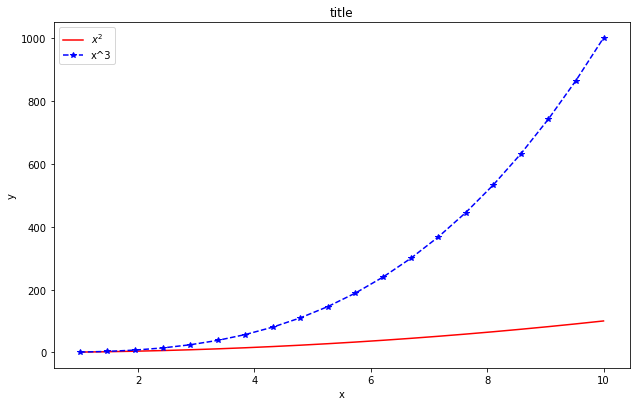

In [95]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, x ** 2, 'r')
axes.plot(x, x ** 3, 'b*--')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')
axes.legend([r'$x^2$', 'x^3'], loc = 0)

plt.show()

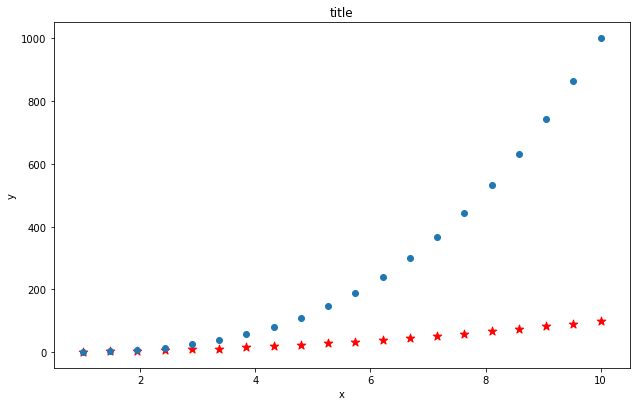

In [96]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(x, x ** 2, color='red', marker='*', s=80)
axes.scatter(x, x ** 3)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

plt.show()

Matplotlib позволяет настраивать многие детали создаваемых графиков:

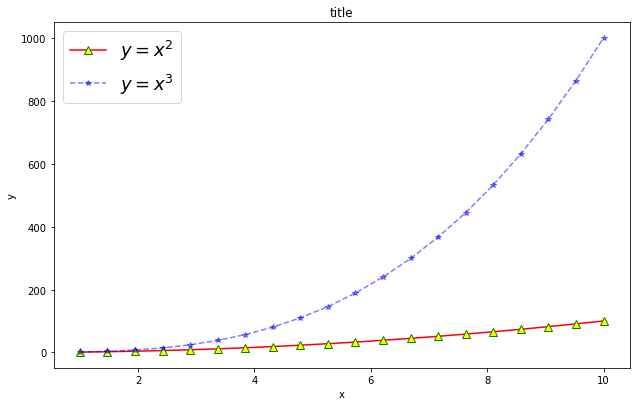

In [97]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, x ** 2, 'r^-', label = r'$y = x^2$', markersize=8, markerfacecolor="yellow", 
          markeredgewidth=1, markeredgecolor="green")
axes.plot(x, x ** 3, 'b*--', label = r'$y = x^3$', alpha = 0.5)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')
axes.legend(loc = 0, fontsize = 18)

plt.show()

Как было упомянуто, matplotlib предоставляет определенную свободу в расположении подграфиков:

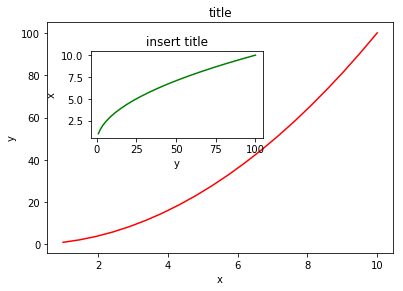

In [98]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, x ** 2, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(x ** 2, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

plt.show()

Впрочем, можно использовать и одну из классических конфигураций:

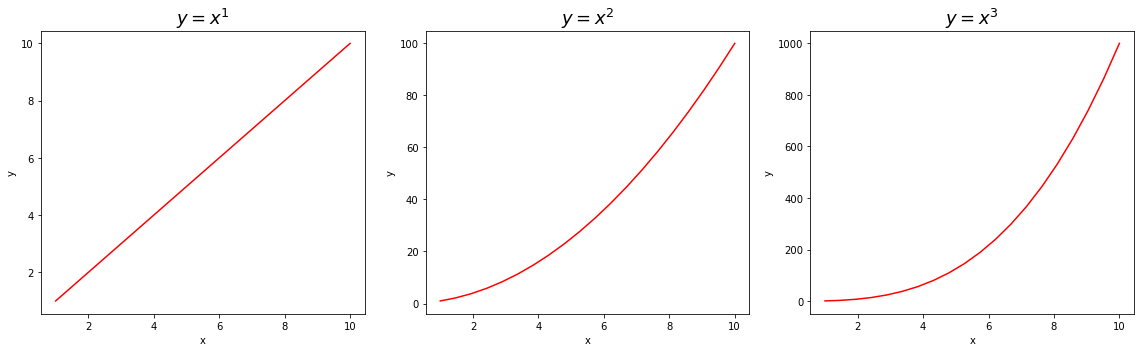

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16, 5))

for pow_num, ax in enumerate(axes):
    ax.plot(x, x ** (pow_num + 1), 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(r'$y = x^' + str(pow_num + 1)+ r'$', fontsize = 18)
fig.tight_layout() # борьба с пересечением подграфиков

Получившийся график можно сохранить в файл:

In [100]:
fig.savefig("pows.png", dpi=200)

Matplotlib также позволяет строить surface plot, используя значения функции в узлах сетки:

In [101]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

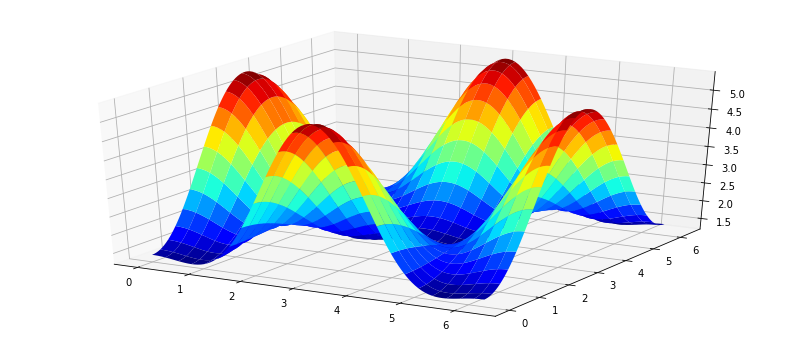

In [102]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(111, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, cmap='jet')

Кроме того, можно строить более детализированные гистограммы по сравнению с теми, что мы рассмотрели ранее:

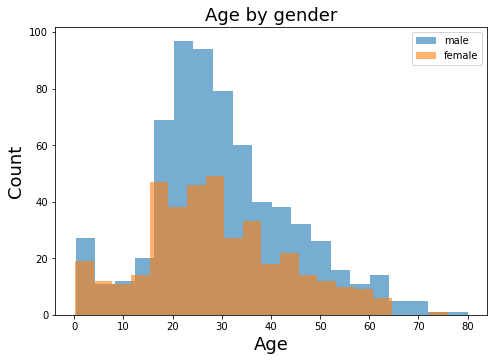

In [103]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
bins = 20
index = np.arange(bins)
axes.hist(pass_data[pass_data['Sex'] == 'male']['age'].dropna(), bins=bins, alpha=0.6, label='male')
axes.hist(pass_data[pass_data['Sex'] == 'female']['age'].dropna(), bins=bins, alpha=0.6, label='female')

axes.legend()
axes.set_xlabel('Age', fontsize=18)
axes.set_ylabel('Count', fontsize=18)
axes.set_title('Age by gender', fontsize=18)

plt.show()

Заметим также, что Matplotlib позволяет использовать многие другие типы визуализации, подробнее про них можно почитать, например, [здесь](http://matplotlib.org/gallery.html) или [здесь](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb).